# Taxi game with OpenAI Gym

Game consist of a 5×5 matrix containing our taxi and four different cabstands labeled with letters.  Also, there are some walls in the environment that our taxi can’t pass. The task of the game is to pick up passengers at one of the cabstands and carry them to their destinations.

To do that, our agent has six possible actions to choose from. He can go north, south, east or west and he can try to pick up or drop off a passenger. This is called the action space of our taxi. Besides the action space we also have to define the state space. As we have 5*5 taxi locations, 5 different passenger locations (because we have to include the passenger being in our taxi) and 4 different destinations, the total number of states is 5*5*5*4 = 500.

Performing actions rewards the agent with points. He receives 20 points for a successful drop-off and loses 1 point for every time-step it takes. The latter results in our agent trying to solve the task fairly quick and prevents him from wandering around. There is also a -10 point penalty for illegal pick-up and drop-off actions and -1 penalty for driving against a wall.

## Q-learning agent

A good way to approach a solution is using the simple Q-learning algorithm, which gives our agent a memory in form of a Q-table of size states x actions we store a value for each state-action combination. hose values estimate the reward we get by taking that action and are called Q-values. Thus Q-values represent the “quality” of an action taken from that state. Higher Q-values imply better chances of getting greater rewards. 

In [0]:
# Import libraries
import gym.spaces
import numpy as np
import matplotlib.pyplot as plt
import csv

In [0]:
# Set environment
env = gym.make("Taxi-v2")

In [0]:
# Initialize stat-action space
state_space = env.observation_space.n
action_space = env.action_space.n

# Create Q-table
qtable = np.zeros((state_space, action_space))

In [0]:
# The learning-rate and discount-factor in the Q-function can be tweaked to improve the learning process (predefined hyper-parameters)
epsilon = 1.0           # Greed 100%
 
epsilon_min = 0.005     # Minimum greed 0.05%
 
epsilon_decay = 0.99993 # Decay multiplied with epsilon after each episode
 
episodes = 50000        # Amount of games
 
max_steps = 100         # Maximum steps per episode
 
learning_rate = 0.65    # learning-rate

gamma = 0.65            # discount-factor of reward

# List of all scores
q_agent_scores = []

All that’s left to do is implementing the procedure of playing games over and over again. In every episode we reset the state. After resetting we choose an action, step the game forward and update our Q-table until the game is over or we reach the maximum steps allowed. Finally we decrease our epsilon each episode.

In [0]:
for episode in range(episodes):
 
    # Reset the game state, done and score before every episode/game
    state = env.reset() # Gets current game state
    done = False        # decides whether the game is over
    score = 0
 
    for _ in range(max_steps):
 
        # With the probability of (1 - epsilon) take the best action in our Q-table
        if np.random.uniform(0, 1) > epsilon:
            action = np.argmax(qtable[state, :])
        # Else take a random action
        else:
            action = env.action_space.sample()
        
        # Step the game forward
        next_state, reward, done, _ = env.step(action)
 
        # Add up the score
        score += reward
 
        # Update our Q-table with our Q-function
        qtable[state, action] = (1 - learning_rate) * qtable[state, action] \
            + learning_rate * (reward + gamma * np.max(qtable[next_state,:]))
 
        # Set the next state as the current state
        state = next_state
 
        if done:
            break
 
    # Reducing our epsilon each episode (Exploration-Exploitation trade-off)
    if epsilon >= epsilon_min:
        epsilon *= epsilon_decay
        
        
    q_agent_scores.append(score)
    
    #print("Episode: {}/{}, score: {}".format(episode+1, episodes, score))

## Random agent

Another attempt to solve the environment is an agent that just takes random actions. Neither does the agent learn, nor remember anything. We are only restricting the allowed amount of moves as before. The implementation is a slimmed version of the Q-learning agent – we are leaving the whole Q-table aspect out. This agent presumably will not performing very well, but we can use the agent in contrast to our Q-learning agent.

In [0]:
# Initializing the list of scores
random_agent_scores = []

# Amount of games the agent plays
episodes = 50000

# Maximum steps the agent has per episode
max_steps = 100

In [0]:
for episode in range(episodes):
  # Reset the state, done and score before every episode
  env.reset()
  done = False
  score = 0
  
  for _ in range(max_steps):
    # Act randomly until done or maximum steps reached
    action = env.action_space.sample()
    _, reward, done, _ = env.step(action)
    score += reward
    
    if done:
      break
      
    random_agent_scores.append(score)
    
    #print("Episode: {}/{}, score: {}".format(episode+1, episodes, score))

## Evaluation of agent

In [0]:
# Save the scores of both agents as csv
with open("random_scores.csv", "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    for v in random_agent_scores:
        writer.writerow([v])

In [0]:
with open("q_scores.csv", "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    for v in q_agent_scores:
        writer.writerow([v])

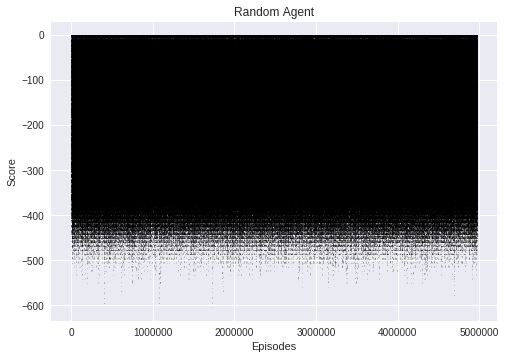

In [20]:
# Plot random agents
plt.plot(random_agent_scores, "ko", markersize=0.3)
plt.title("Random Agent")
plt.xlabel('Episodes')
plt.ylabel('Score')
plt.show()

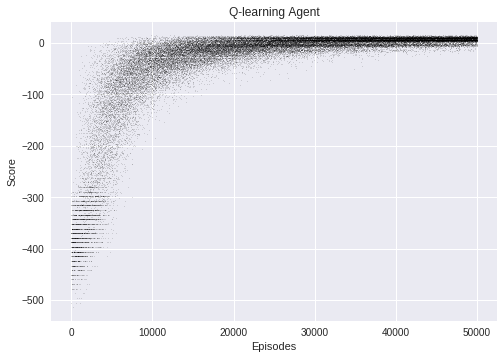

In [21]:
# Plot Q-learning agents
plt.plot(q_agent_scores, "ko", markersize=0.3)
plt.title("Q-learning Agent")
plt.xlabel('Episodes')
plt.ylabel('Score')
plt.show()